# Install PyKeen

In [1]:
! python -c "import pykeen" || pip install git+https://github.com/pykeen/pykeen.git
# pykeen.env()

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'pykeen'
  Cloning https://github.com/pykeen/pykeen.git to /tmp/pip-req-build-uyxfg630
  Running command git clone --filter=blob:none --quiet https://github.com/pykeen/pykeen.git /tmp/pip-req-build-uyxfg630
  Resolved https://github.com/pykeen/pykeen.git to commit 6e988d52672be3d5f3a03aa084fa4aaf5db74963
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

# Train a Model Using a Pipeline
Using the Nations dataset, the pipeline function (which can have many configurations for evaluators, training loop, and more, I kept it very basic here) creates a pipeline_result which can produce several different plots of the data and training process. The trained model can be accessed from pipeline_result.model and used in other PyKeen functions, such as the prediction functions.

https://pykeen.readthedocs.io/en/stable/tutorial/first_steps.html#training-a-model
https://pykeen.readthedocs.io/en/stable/reference/pipeline.html


INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/validation
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()


Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/201 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=14, num_relations=55, create_inverse_triples=False, num_triples=1592, path="/usr/local/lib/python3.11/dist-packages/pykeen/datasets/nations/train.txt") to file:///content/nations_transe/training_triples
INFO:pykeen.pipeline.api:Saved to directory: /content/nations_transe


(<Figure size 3000x1600 with 2 Axes>,
 array([<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>,
        <Axes: title={'center': 'Entity/Relation Plot using PCA'}>],
       dtype=object))

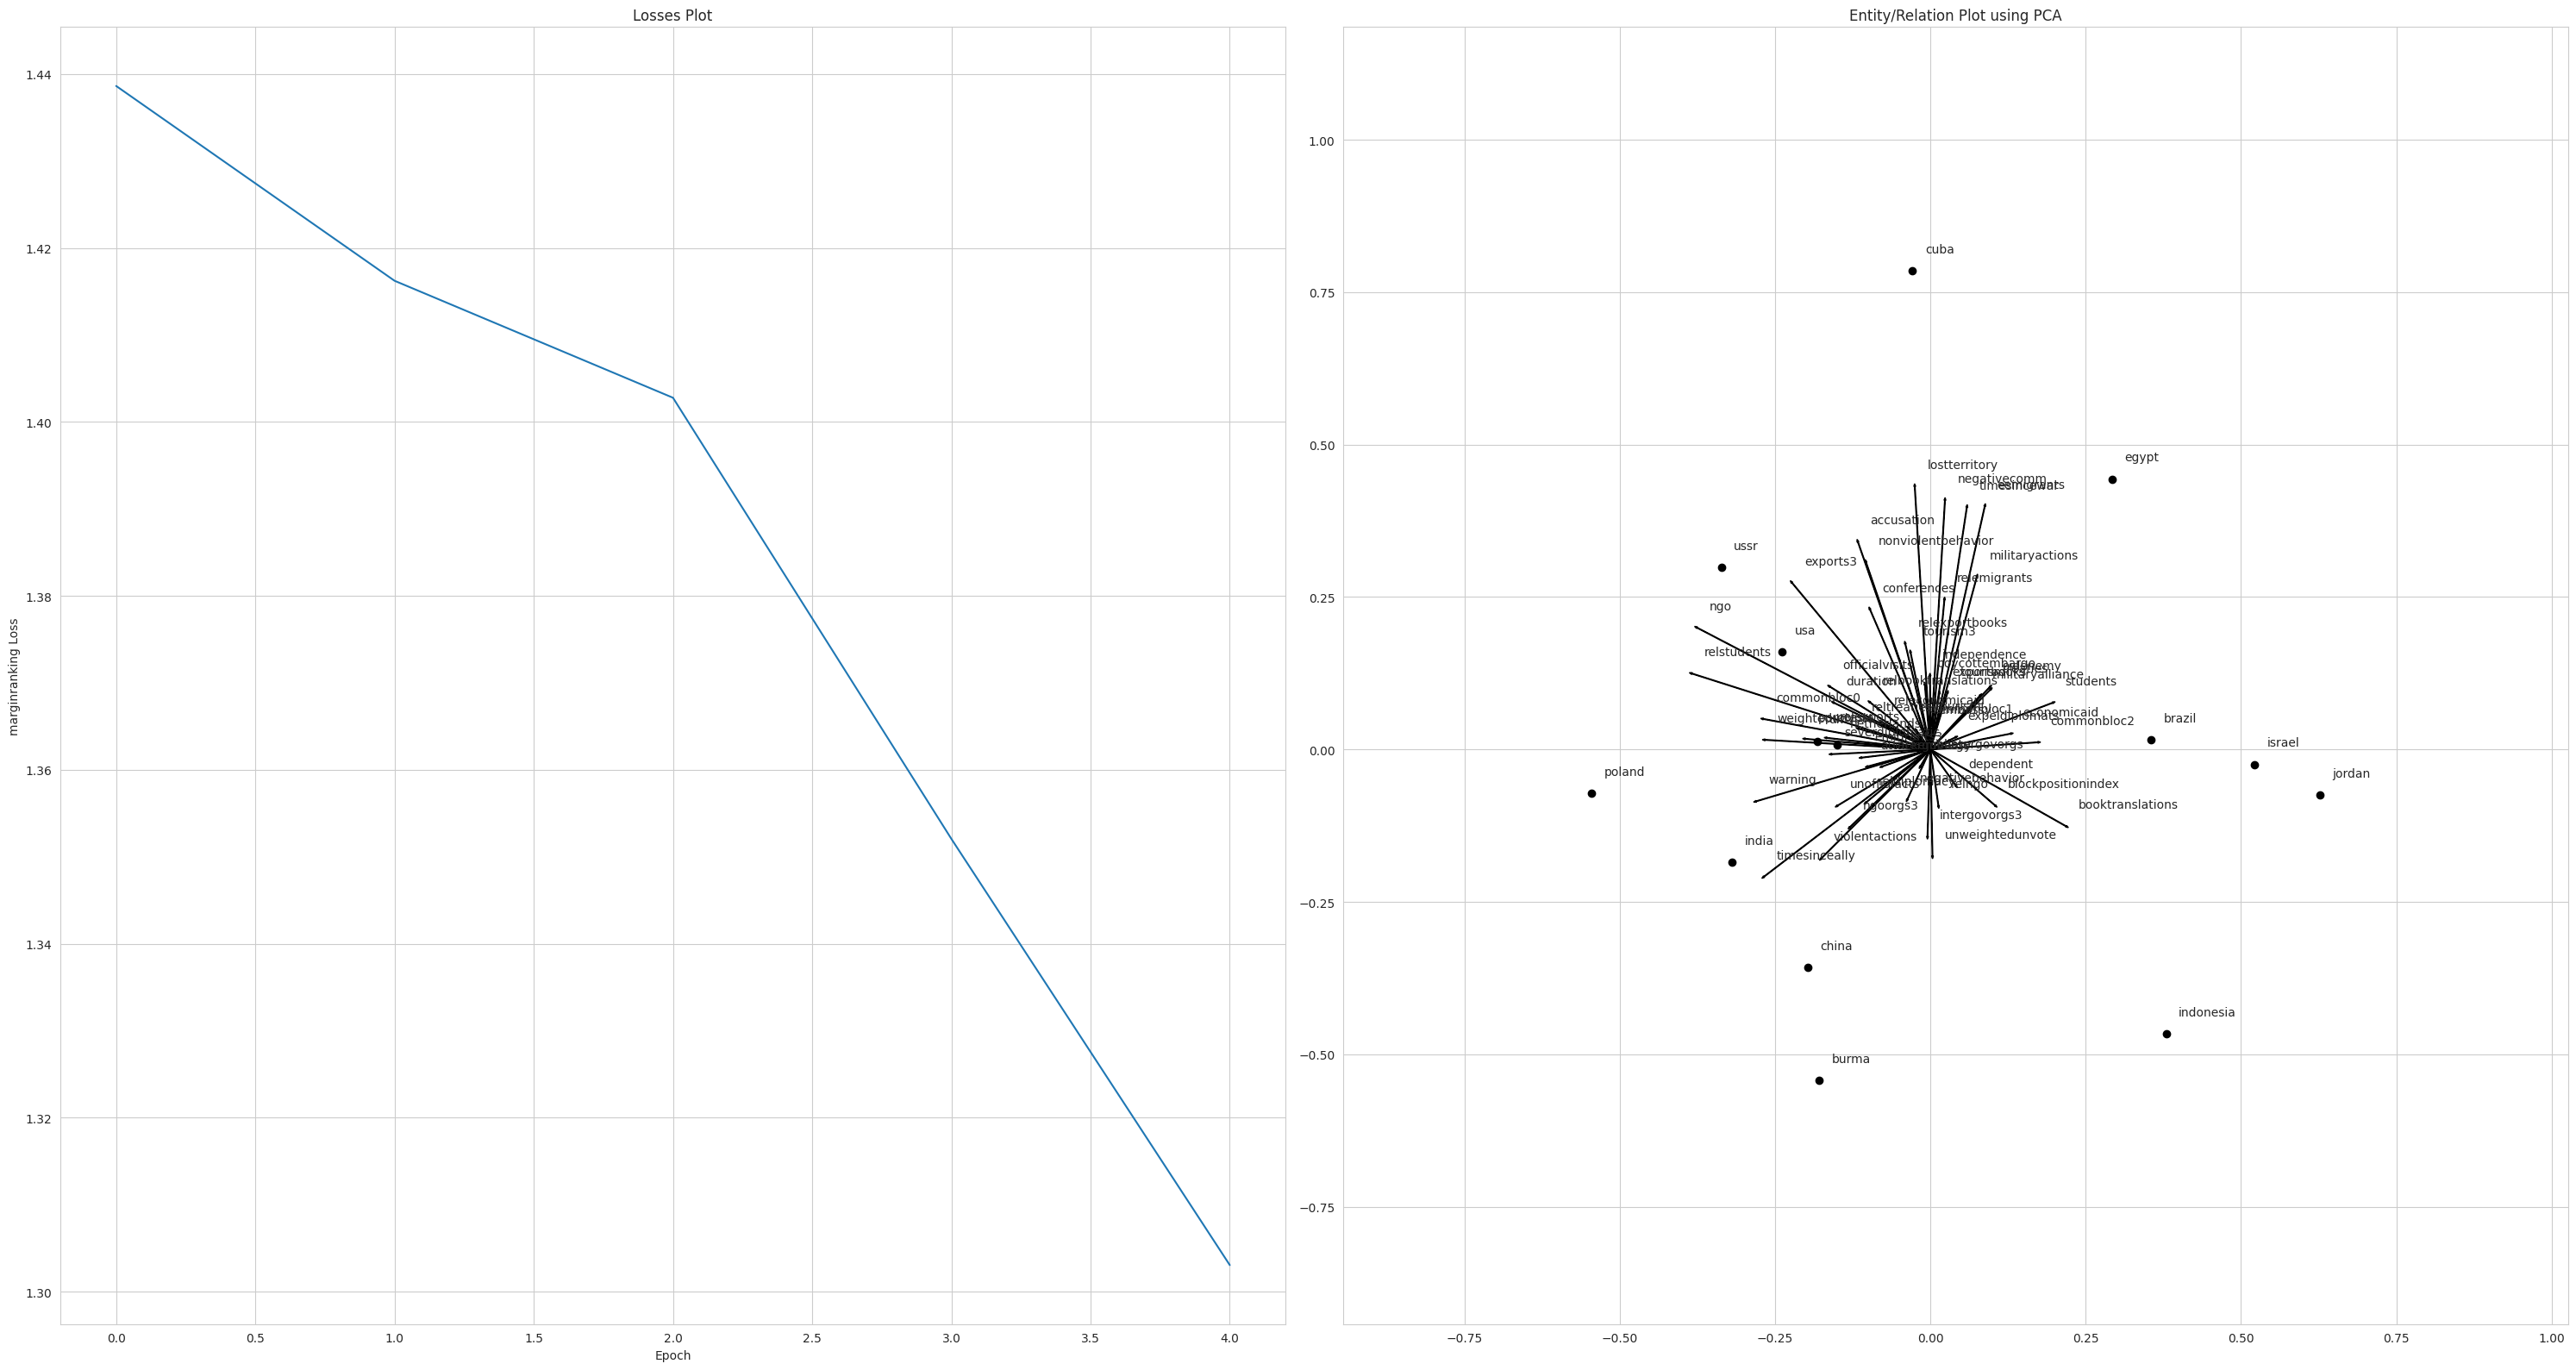

In [88]:
from pykeen.pipeline import pipeline
from pykeen.pipeline import plot
pipeline_result = pipeline(
    dataset='Nations',
    model='TransE',
)
pipeline_result.save_to_directory('nations_transe')
plot(pipeline_result, figsize=(30,16))

# Labels and their IDs

In [89]:
import torch

from pykeen.datasets.utils import get_dataset
from pykeen.triples.triples_factory import TriplesFactory
from pykeen.triples.utils import get_entities
# from pykeen.utils import get_labeler


# As an example, we will use a small dataset that comes with entity and relation labels.
dataset = get_dataset(dataset="nations")
triples_factory = dataset.training
# Get tensor of entity identifiers
entity_ids = torch.as_tensor(triples_factory.entities_to_ids(["china", "egypt", "usa"]))
print(entity_ids)
relation_ids = torch.as_tensor(triples_factory.relations_to_ids(["independence", "embassy"]))
print(relation_ids)

# labeler = get_labeler(triples_factory)
# print(labeler.get_label_for_id(entity_ids[0]))
entitiesDict = triples_factory.entity_id_to_label
print(entitiesDict)

relationsDict = triples_factory.relation_id_to_label
print(relationsDict)

frequent_relation_ids = triples_factory.get_most_frequent_relations(4)
print(triples_factory.get_most_frequent_relations(4))


INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/validation
INFO:pykeen.triples.triples_factory:applying cutoff of 4 to TriplesFactory(num_entities=14, num_relations=55, create_inverse_triples=False, num_triples=1592, path="/usr/local/lib/python3.11/dist-packages/pykeen/datasets/nations/train.txt")
INFO:pykeen.triples.triples_factory:applying cutoff of 4 to TriplesFactory(num_entities=14, num_relations=55, create_inverse_triples=False, num_triples=1592, path="/usr/local/lib/python3.11

tensor([ 2,  4, 12])
tensor([19, 14])
{0: 'brazil', 1: 'burma', 2: 'china', 3: 'cuba', 4: 'egypt', 5: 'india', 6: 'indonesia', 7: 'israel', 8: 'jordan', 9: 'netherlands', 10: 'poland', 11: 'uk', 12: 'usa', 13: 'ussr'}
{0: 'accusation', 1: 'aidenemy', 2: 'attackembassy', 3: 'blockpositionindex', 4: 'booktranslations', 5: 'boycottembargo', 6: 'commonbloc0', 7: 'commonbloc1', 8: 'commonbloc2', 9: 'conferences', 10: 'dependent', 11: 'duration', 12: 'economicaid', 13: 'eemigrants', 14: 'embassy', 15: 'emigrants3', 16: 'expeldiplomats', 17: 'exportbooks', 18: 'exports3', 19: 'independence', 20: 'intergovorgs', 21: 'intergovorgs3', 22: 'lostterritory', 23: 'militaryactions', 24: 'militaryalliance', 25: 'negativebehavior', 26: 'negativecomm', 27: 'ngo', 28: 'ngoorgs3', 29: 'nonviolentbehavior', 30: 'officialvisits', 31: 'pprotests', 32: 'relbooktranslations', 33: 'reldiplomacy', 34: 'releconomicaid', 35: 'relemigrants', 36: 'relexportbooks', 37: 'relexports', 38: 'relintergovorgs', 39: 'relngo

# Predictions

PyKeen calculates scores for triples which help to predict how likely it is that that triple is true. The higher the score (or less negative), the more likely a triple is to be true.

**Triple Scoring**

Obtain a prediction score for each of the given triples. Here we calculate scores for all of the triples in the validation set of the nations dataset.

In [90]:
# triple scoring (here we calculate scores for all validation triples in the dataset)
from pykeen.predict import predict_triples
pack = predict_triples(model=pipeline_result.model, triples=dataset.validation)
# convert to dataframe to match labels to scores
df = pack.process(factory=pipeline_result.training).df
# show triples with the highest scores
df.nlargest(n=5, columns="score")

,head_id,head_label,relation_id,relation_label,tail_id,tail_label,score
100,7,israel,52,violentactions,8,jordan,-7.978563
123,9,netherlands,51,unweightedunvote,10,poland,-7.998135
38,2,china,33,reldiplomacy,1,burma,-8.155906
113,9,netherlands,14,embassy,10,poland,-8.206766
192,13,ussr,37,relexports,11,uk,-8.219592


In [91]:
df.groupby(by=["head_id", "head_label"]).agg({"score": ["mean", "std", "count"]})

score                
                          mean       std count
head_id head_label                            
0       brazil      -10.013690  1.107172    11
1       burma       -10.530767  0.991114    15
2       china       -10.190922  0.979801    20
3       cuba        -10.265629  0.645369    18
4       egypt        -9.954839  0.811868     9
5       india        -9.631997  1.022150     9
6       indonesia   -10.474958  0.813381     8
7       israel       -9.748965  0.997478    14
8       jordan       -9.696442  0.681051     7
9       netherlands -10.069998  1.106114    13
10      poland      -10.045680  0.606295    18
11      uk          -10.024396  0.796785    22
12      usa         -10.217783  0.697663    14
13      ussr         -9.816435  1.003069    21

**Target Scoring**

Used for link prediction or relation prediction. For example, we can use PyKeen's target scoring to get scores for all possible tail entities for the query ("uk", "conferences", ?).

In [92]:
from pykeen.predict import predict_target

pred = predict_target(
    model=pipeline_result.model,
    head="uk",
    relation="conferences",
    triples_factory=pipeline_result.training,
)
pred.df

,tail_id,score,tail_label
11,11,-6.165523,uk
3,3,-8.875881,cuba
5,5,-8.907442,india
1,1,-9.052085,burma
0,0,-9.310015,brazil
4,4,-9.373451,egypt
9,9,-9.437757,netherlands
12,12,-9.570021,usa
13,13,-10.032101,ussr
10,10,-10.425377,poland


We can do some post-processing on the prediction results.

For example, here we remove all targets which are already known from the training set

In [93]:
pred_filtered = pred.filter_triples(dataset.training)
pred_filtered.df

,tail_id,score,tail_label
11,11,-6.165523,uk
0,0,-9.310015,brazil
4,4,-9.373451,egypt
12,12,-9.570021,usa
2,2,-10.710791,china
8,8,-10.776158,jordan
6,6,-10.804993,indonesia
7,7,-10.984652,israel


We can also add additional columns to the dataframe showing whether the target is contained in another set, e.g., the validation or testing set.


In [94]:
pred_annotated = pred_filtered.add_membership_columns(validation=dataset.validation, testing=dataset.testing)
pred_annotated.df

,tail_id,score,tail_label,in_validation,in_testing
11,11,-6.165523,uk,False,False
0,0,-9.310015,brazil,True,False
4,4,-9.373451,egypt,False,False
12,12,-9.570021,usa,True,False
2,2,-10.710791,china,False,False
8,8,-10.776158,jordan,False,False
6,6,-10.804993,indonesia,False,True
7,7,-10.984652,israel,False,False


**Full Scoring**

We can also calculate scores for *all* possible triples. This can be pretty expensive though computationally, especially for larger kgs.

In [95]:
from pykeen.predict import predict_all
pack = predict_all(model=pipeline_result.model)
df = pack.process(factory=pipeline_result.training).df
df

scoring:   0%|          | 0.00/770 [00:00<?, ?batch/s]

,head_id,head_label,relation_id,relation_label,tail_id,tail_label,score
0,13,ussr,31,pprotests,13,ussr,-5.939889
1,0,brazil,31,pprotests,0,brazil,-5.939889
2,12,usa,31,pprotests,12,usa,-5.939889
3,11,uk,31,pprotests,11,uk,-5.939889
4,1,burma,31,pprotests,1,burma,-5.939889
...,...,...,...,...,...,...,...
10775,10,poland,6,commonbloc0,4,egypt,-13.018588
10776,2,china,52,violentactions,0,brazil,-13.040860
10777,1,burma,45,timesinceally,4,egypt,-13.044656
10778,4,egypt,13,eemigrants,1,burma,-13.097919


To reduce memory requirements, we can store only the triples with the top k scores:

In [30]:
pack = predict_all(model=pipeline_result.model, k=10)
df = pack.process(factory=pipeline_result.training).df
df

scoring:   0%|          | 0.00/770 [00:00<?, ?batch/s]

,head_id,head_label,relation_id,relation_label,tail_id,tail_label,score
0,11,uk,35,relemigrants,11,uk,-5.764991
1,2,china,35,relemigrants,2,china,-5.764991
2,0,brazil,35,relemigrants,0,brazil,-5.764991
3,3,cuba,35,relemigrants,3,cuba,-5.764991
4,8,jordan,35,relemigrants,8,jordan,-5.764991
5,10,poland,35,relemigrants,10,poland,-5.764991
6,9,netherlands,35,relemigrants,9,netherlands,-5.764991
7,7,israel,35,relemigrants,7,israel,-5.764991
8,6,indonesia,35,relemigrants,6,indonesia,-5.764991
9,1,burma,35,relemigrants,1,burma,-5.764991


# Evaluate the model



# Embedding Visualization


https://wasit7.medium.com/tutorial-knowledge-graph-embedding-with-pykeen-22d3b7847cea

See if it is more likely for usa to have higher con

there are many triples with (?, "conferences", "usa")**bold text**

In [61]:
# pred = predict_target(
#     model=pipeline_result.model,
#     # head="uk",
#     relation="conferences",
#     tail="usa",
#     triples_factory=pipeline_result.training,
# )
# pred.df


conferences_dataset = dataset.restrict(relations={"conferences"})
conferences_dataset.summarize(show_examples=66)
# print(conferences_dataset.training.mapped_triples)


pack = predict_triples(model=pipeline_result.model, triples=conferences_dataset.validation)
df = pack.process(factory=pipeline_result.training).df
df.groupby(by=["head_id", "head_label"]).agg({"score": ["mean", "std", "count"]})

INFO:pykeen.triples.triples_factory:keeping 1/55 (1.82%) relations.
INFO:pykeen.triples.triples_factory:keeping 58/1592 (3.64%) triples.
INFO:pykeen.datasets.base:keeping 2/201 (1.00%) triples.
INFO:pykeen.datasets.base:keeping 6/199 (3.02%) triples.


EagerDataset (create_inverse_triples=False)
Name        Entities    Relations      Triples
----------  ----------  -----------  ---------
Training    12          1                   58
Testing     12          1                    2
Validation  12          1                    6
Total       -           -                   66
Head         Relation     tail
-----------  -----------  -----------
brazil       conferences  cuba
brazil       conferences  india
brazil       conferences  usa
brazil       conferences  ussr
burma        conferences  india
burma        conferences  indonesia
burma        conferences  uk
burma        conferences  usa
burma        conferences  ussr
cuba         conferences  brazil
cuba         conferences  india
cuba         conferences  uk
cuba         conferences  usa
cuba         conferences  ussr
egypt        conferences  jordan
india        conferences  brazil
india        conferences  burma
india        conferences  cuba
india        conferences  indonesia
ind

score                
                          mean       std count
head_id head_label                            
0       brazil      -10.371754  0.206979     2
2       china        -9.965590       NaN     1
9       netherlands  -9.723544  0.813681     2
11      uk          -11.271972       NaN     1

In [49]:
df.groupby(by=["tail_id", "tail_label"]).agg({"score": ["mean", "std", "count"]})

score                
                          mean       std count
tail_id tail_label                            
0       brazil       -9.148185       NaN     1
8       jordan      -10.241850  0.390690     2
9       netherlands -10.225397       NaN     1
10      poland      -10.785438  0.688063     2

In [96]:
# dataset = get_dataset(dataset="nations")
usa_dataset = dataset.restrict(entities={"usa", "uk"})
usa_dataset.summarize()

INFO:pykeen.triples.triples_factory:keeping 2/14 (14.29%) entities.
INFO:pykeen.triples.triples_factory:keeping 46/1592 (2.89%) triples.
INFO:pykeen.datasets.base:keeping 5/201 (2.49%) triples.
INFO:pykeen.datasets.base:keeping 4/199 (2.01%) triples.


EagerDataset (create_inverse_triples=False)
Name        Entities    Relations      Triples
----------  ----------  -----------  ---------
Training    2           30                  46
Testing     2           30                   5
Validation  2           30                   4
Total       -           -                   55
Head    Relation     tail
------  -----------  ------
uk      commonbloc2  usa
uk      eemigrants   usa
uk      embassy      usa
uk      emigrants3   usa
uk      exportbooks  usa



INFO:pykeen.triples.triples_factory:keeping 1/55 (1.82%) relations.
INFO:pykeen.triples.triples_factory:keeping 11/1592 (0.69%) triples.
INFO:pykeen.datasets.base:keeping 0/201 (0.00%) triples.
INFO:pykeen.datasets.base:keeping 1/199 (0.50%) triples.


EagerDataset (create_inverse_triples=False)
Name        Entities    Relations      Triples
----------  ----------  -----------  ---------
Training    9           1                   11
Testing     9           1                    0
Validation  9           1                    1
Total       -           -                   12
Head         Relation     tail
-----------  -----------  ------
brazil       relstudents  usa
egypt        relstudents  uk
egypt        relstudents  usa
india        relstudents  uk
india        relstudents  usa
indonesia    relstudents  egypt
israel       relstudents  usa
jordan       relstudents  egypt
jordan       relstudents  usa
netherlands  relstudents  usa
usa          relstudents  uk



(<Figure size 8000x3200 with 2 Axes>,
 array([<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>,
        <Axes: title={'center': 'Entity/Relation Plot using PCA'}>],
       dtype=object))

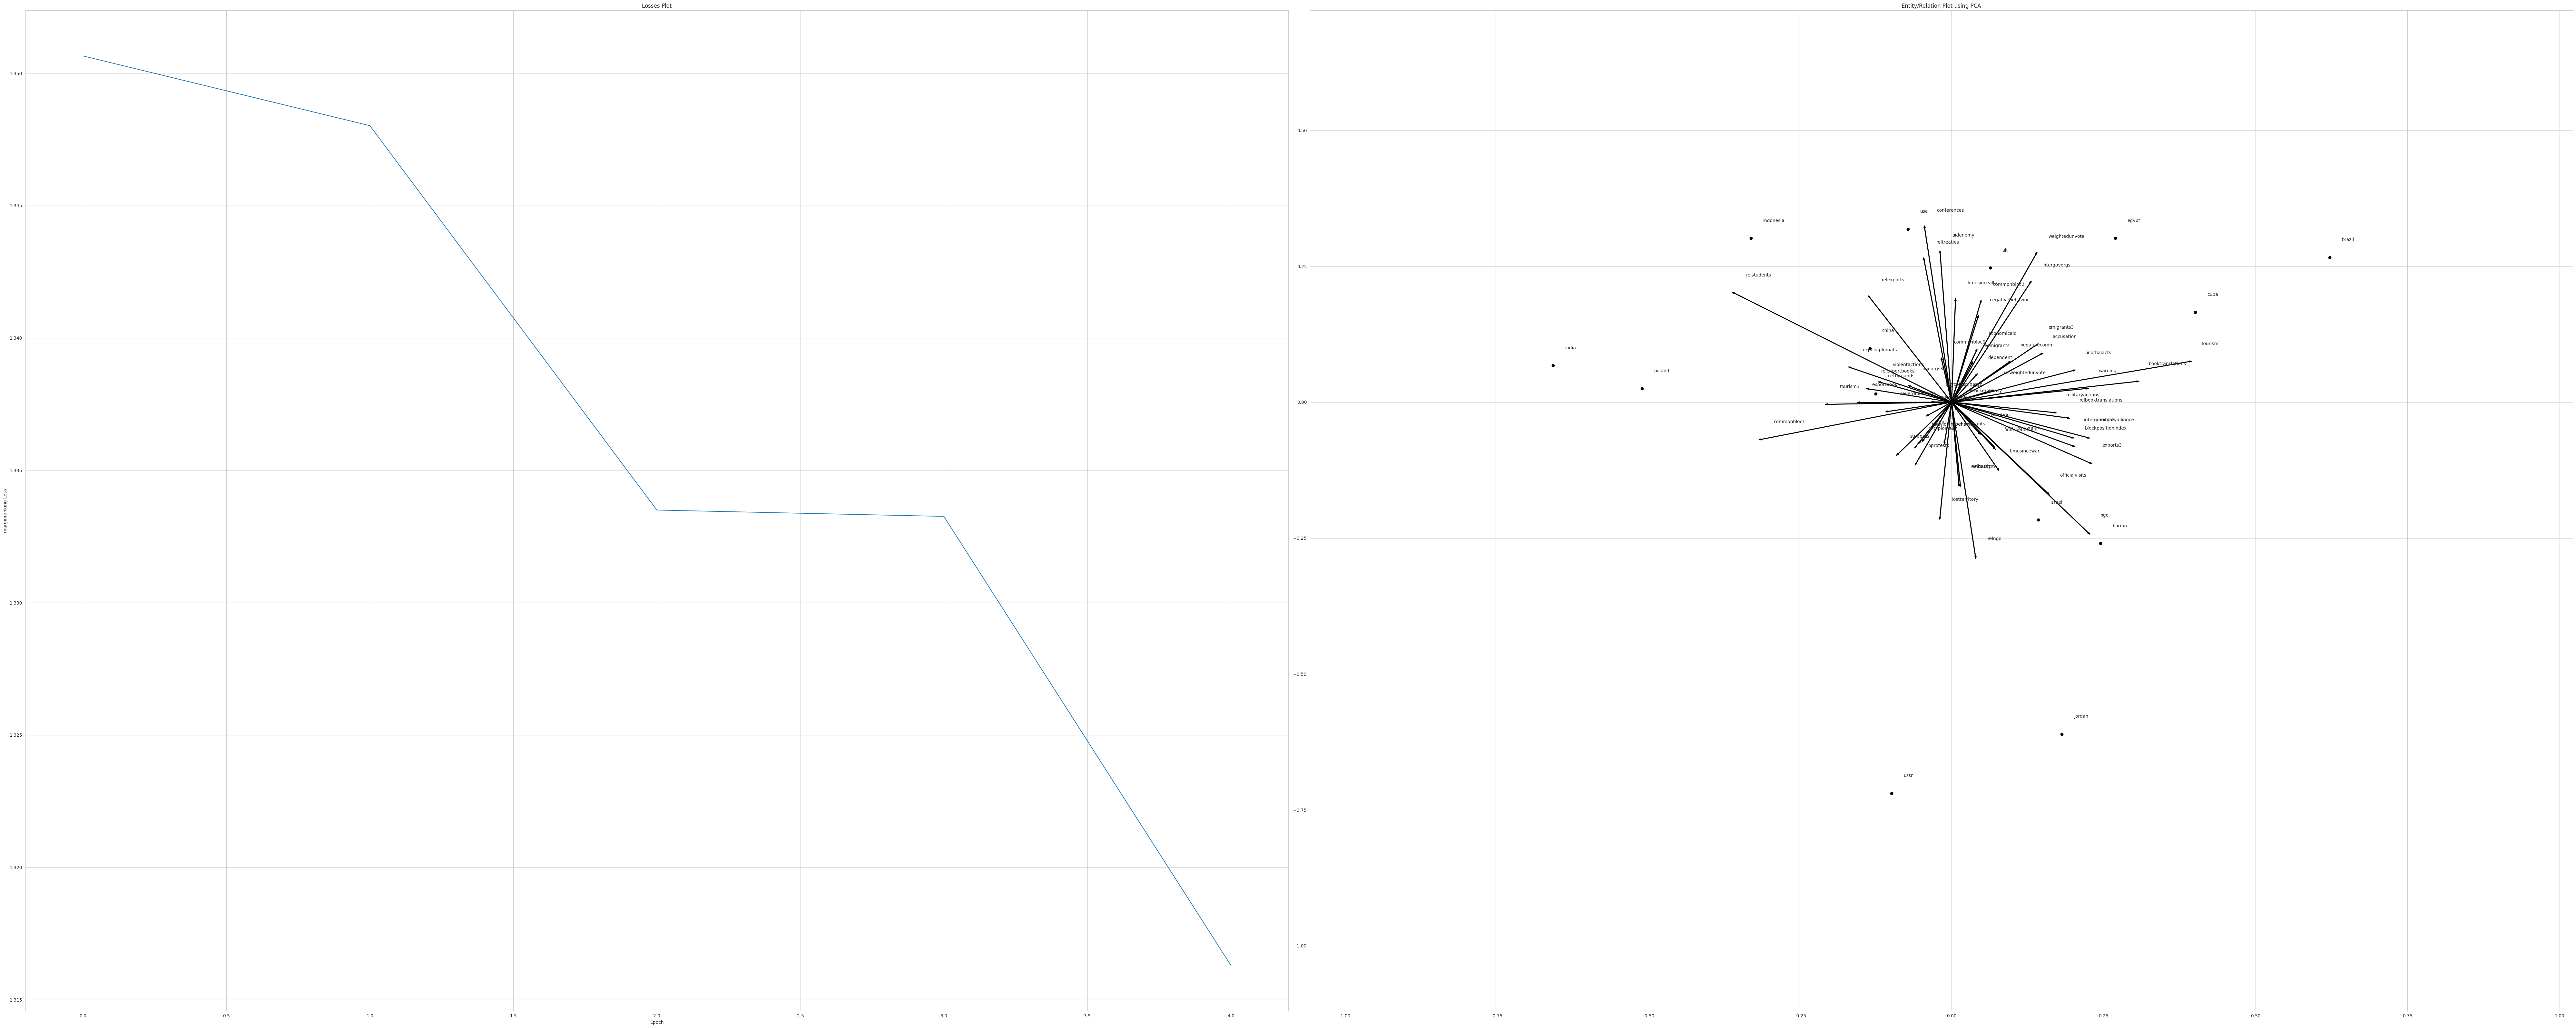

In [66]:
relstudents_dataset = dataset.restrict(relations={"relstudents"})
relstudents_dataset.summarize(show_examples=12)
plot(pipeline_result=pipeline_result, figsize=(80, 32))

If a single relation is removed, how does the prediction score change?

In [139]:
import pandas as pd
df = pd.DataFrame(dataset.training.mapped_triples.numpy(), columns=['head', 'relation', 'tail'])
display(df)
exclude_triples = [
    ('brazil', 'conferences', 'cuba'),
    ('cuba', 'conferences', 'brazil')
]
# excluded_tf = TriplesFactory.from_labeled_triples(
#     triples=[['brazil', 'conferences', 'cuba']],
#     create_inverse_triples=True
# )

df = pd.DataFrame({'subject': ['brazil'], 'predicate': ['conferences'], 'object': ['cuba']})

# filtered_df = df[df[0] != 'brazil' and df[1] != 'conferences' and df[2] != 'cuba']
# filtered_df = df.query(df[0] != 'brazil' and df[1] != 'conferences' and df[2] != 'cuba')
filtered_df = df[(df['head'] != 'brazil') & (df['relation'] != 'conferences') & (df['tail'] != 'cuba')]
    # df[0] != 'brazil' and df[1] != 'conferences' and df[2] != 'cuba']

dataset.summarize()
without_brazil_conferences_cuba = dataset #.restrict(entities={"brazil", "cuba"}, relations={"conferences"}, invert_entity_selection=True, invert_relation_selection=True)
# without_brazil_conferences_cuba.training = dataset.training.clone_and_exchange_triples()
print(dataset.training.triples)
without_brazil_conferences_cuba.training.triples = dataset.training.triples - ['brazil', 'conferences', 'cuba']
# dlka = dataset.restrict(entities={"usa", "uk"})
without_brazil_conferences_cuba.summarize()
dataset.create_inverse_triples

,head,relation,tail
0,0,3,2
1,0,3,3
2,0,3,10
3,0,3,13
4,0,4,11
...,...,...,...
1587,13,51,11
1588,13,54,7
1589,13,54,9
1590,13,54,11


KeyError: 'head'

**Using UMLS dataset**

In [69]:
dataset = get_dataset(dataset="UMLS")
dataset

INFO:pykeen.datasets.utils:Caching preprocessed dataset to file:///root/.data/pykeen/datasets/umls/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=135, num_relations=46, create_inverse_triples=False, num_triples=5216, path="/usr/local/lib/python3.11/dist-packages/pykeen/datasets/umls/train.txt") to file:///root/.data/pykeen/datasets/umls/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.datasets.base:Stored training factory to file:///root/.data/pykeen/datasets/umls/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=135, num_relations=46, create_inverse_triples=False, num_triples=661, path="/usr/local/lib/python3.11/dist-packages/pykeen/datasets/umls/test.txt") to file:///root/.data/pykeen/datasets/umls/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.datasets.base:Stored testing factory to file:///root/.data/pykeen/datasets/umls/cache/47

UMLS(training_path="/usr/local/lib/python3.11/dist-packages/pykeen/datasets/umls/train.txt", testing_path="/usr/local/lib/python3.11/dist-packages/pykeen/datasets/umls/test.txt", validation_path="/usr/local/lib/python3.11/dist-packages/pykeen/datasets/umls/valid.txt")

INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///root/.data/pykeen/datasets/umls/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/umls/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/umls/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/umls/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/validation
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()


Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0.00/21.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/21.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/21.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/21.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/21.0 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/661 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.33s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=135, num_relations=46, create_inverse_triples=False, num_triples=5216, path="/usr/local/lib/python3.11/dist-packages/pykeen/datasets/umls/train.txt") to file:///content/umls_transe/training_triples
INFO:pykeen.pipeline.api:Saved to directory: /content/umls_transe


(<Figure size 6000x3200 with 2 Axes>,
 array([<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>,
        <Axes: title={'center': 'Entity/Relation Plot using PCA'}>],
       dtype=object))

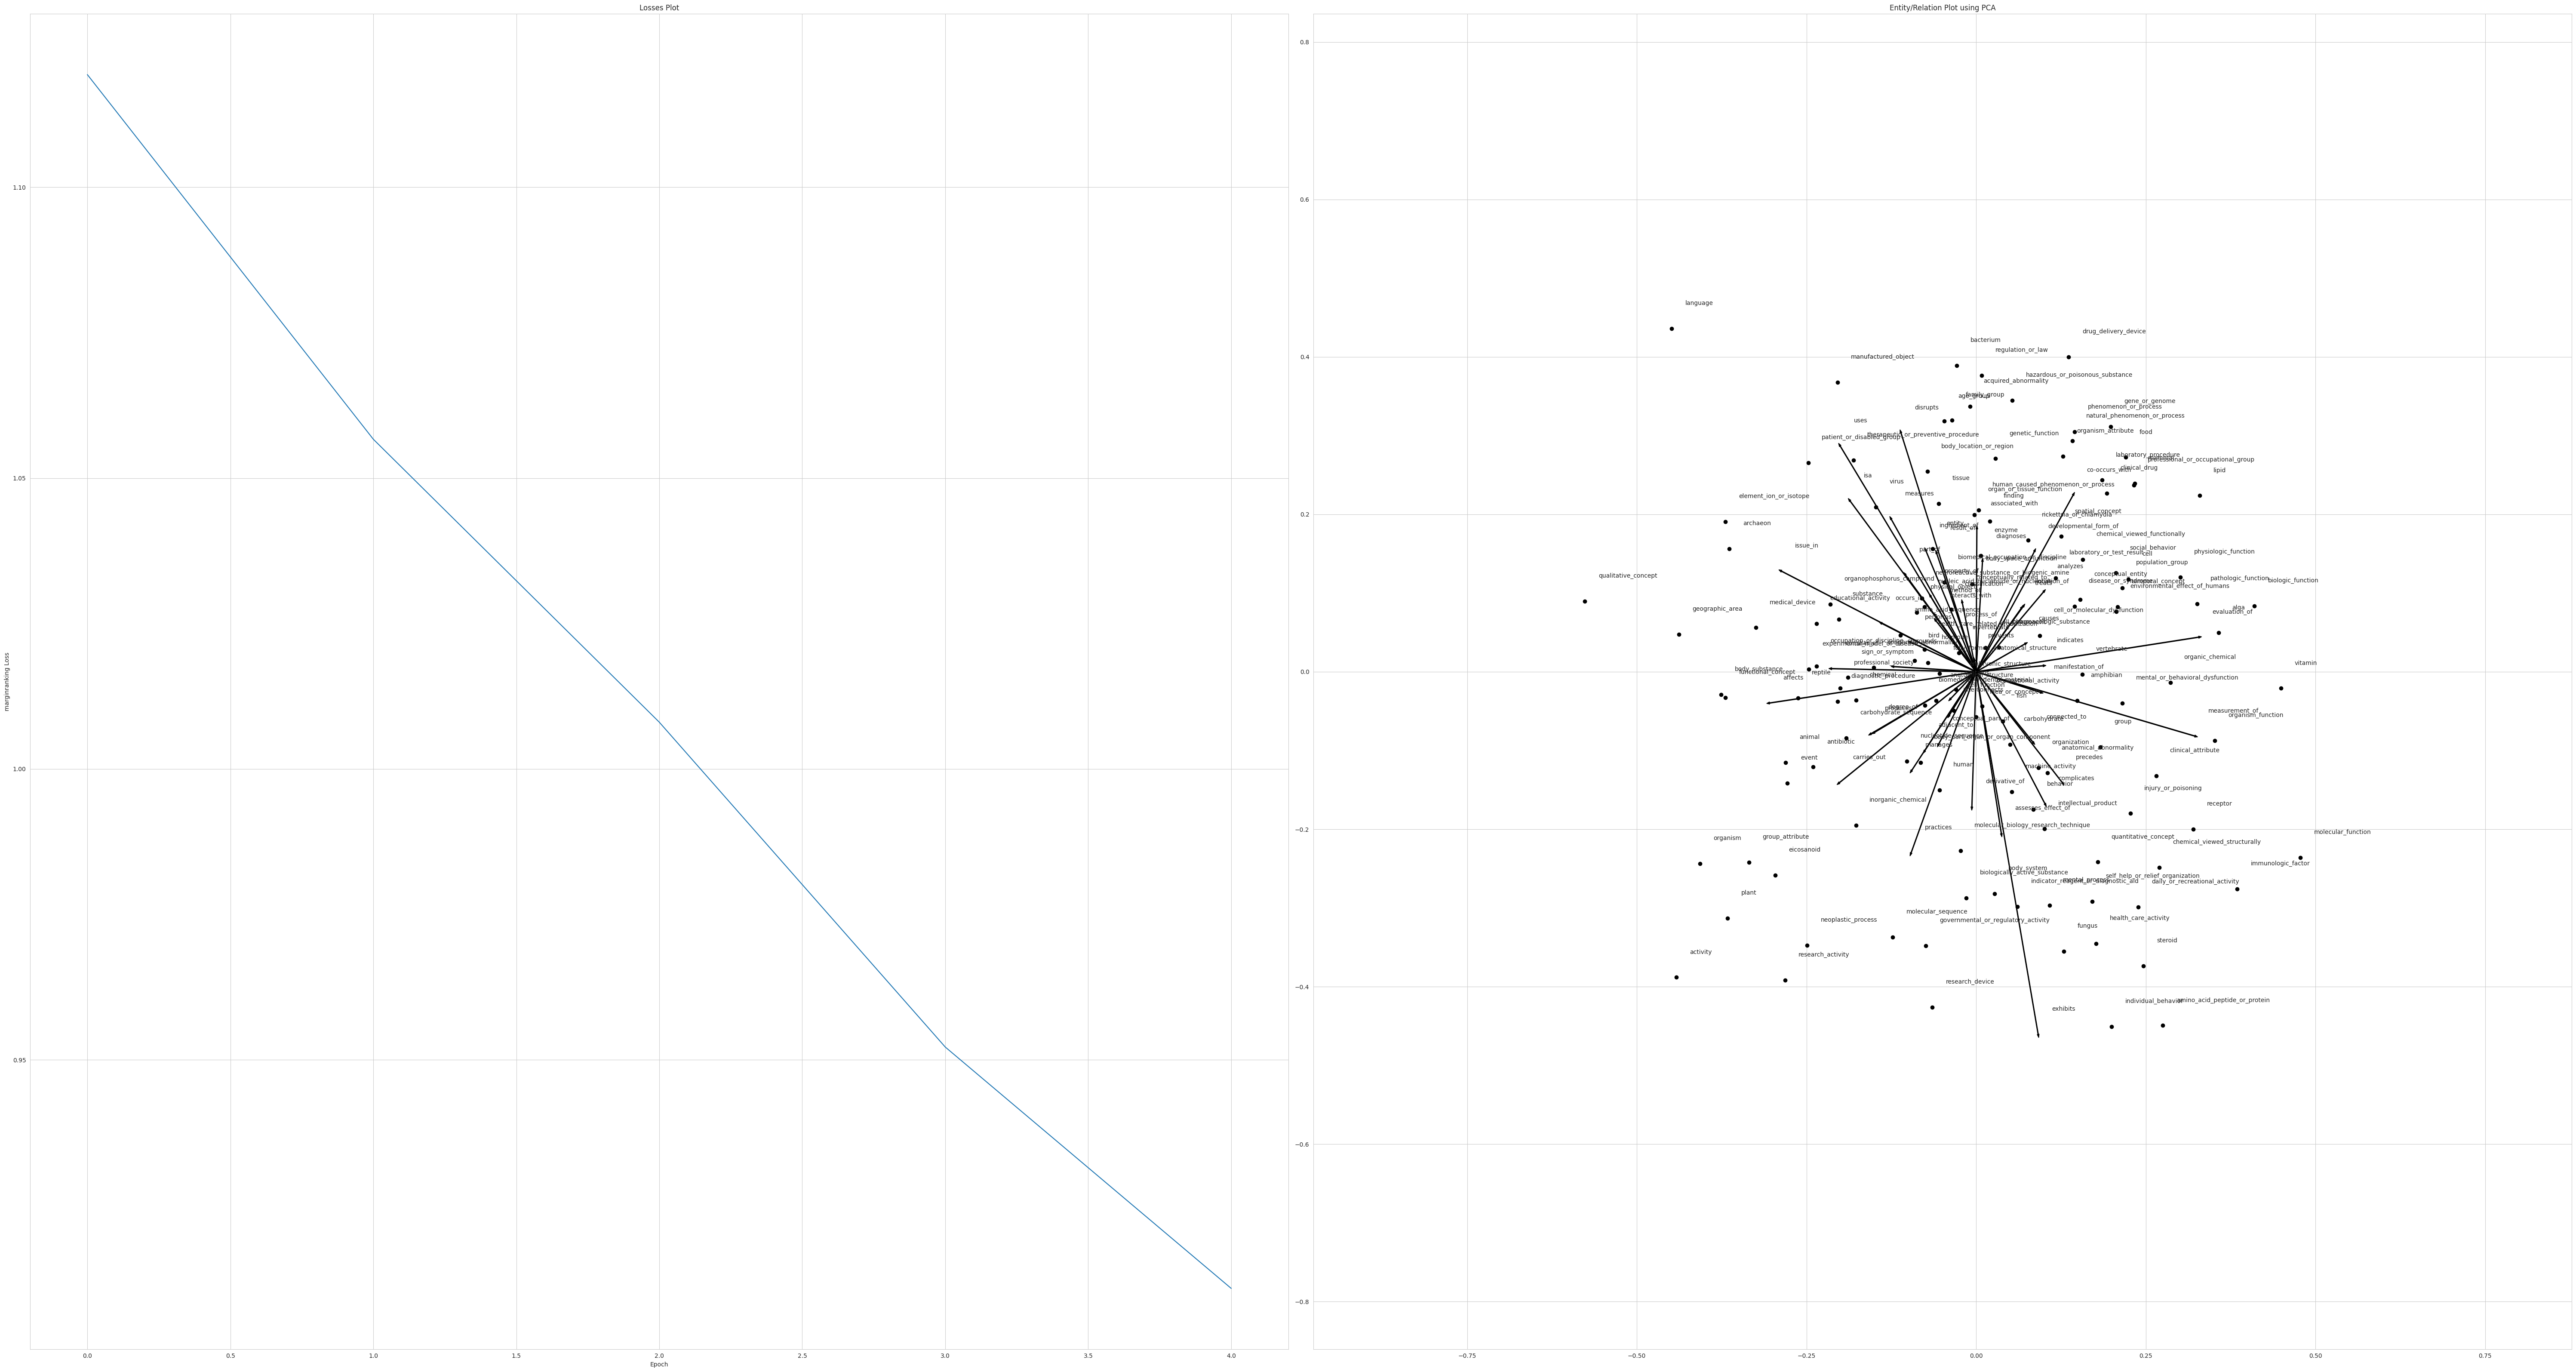

In [70]:
pipeline_result = pipeline(
    dataset='UMLS',
    model='TransE',
)
pipeline_result.save_to_directory('umls_transe')
plot(pipeline_result, figsize=(60,32))